Import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from config import weather_api_key
import requests

Finding count totals, Dropping NaN, dropping unnecessary columns

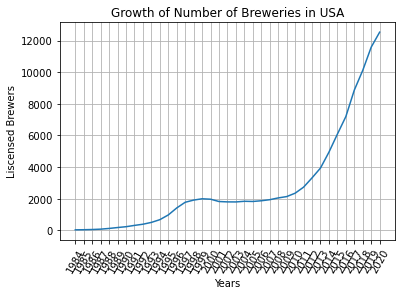

In [32]:
fed_beer_df = pd.read_csv("../Resources/brewery_count.csv")
total_count_series = fed_beer_df.sum()
total_count_series = total_count_series.drop("STATE")
years = total_count_series.index
plt.plot(years, total_count_series)
plt.xlabel("Years")
plt.ylabel("Liscensed Brewers")
plt.title("Growth of Number of Breweries in USA")
plt.grid(True)
plt.xticks(rotation = 60)
#plt.figure()  ask bailey
plt.show()

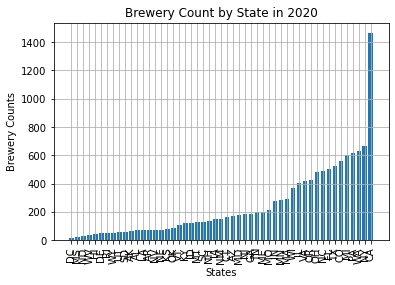

In [53]:
fed_2020 = fed_beer_df[["STATE", "2020"]].sort_values(by = "2020")
plt.bar(x = fed_2020["STATE"], height = fed_2020["2020"])
plt.xlabel("States")
plt.ylabel("Brewery Counts")
plt.title("Brewery Count by State in 2020")
plt.grid(True)
plt.xticks(rotation = 90)
#plt.figure() ask bailey
plt.show()

In [59]:
openbrewery_db = pd.read_csv("../Resources/breweries.csv")
openbrewery_db = openbrewery_db[["name", "brewery_type", "street", "state", "postal_code", "country", "longitude", "latitude"]]
dropped_df = openbrewery_db.dropna()
dropped_df

,name,brewery_type,street,state,postal_code,country,longitude,latitude
0,10-56 Brewing Company,micro,400 Brown Cir,Indiana,46534,United States,-86.627954,41.289715
3,10 Barrel Brewing Co - Bend Pub,large,62950 NE 18th St,Oregon,97701,United States,-121.280954,44.091211
4,10 Barrel Brewing Co - Boise,large,826 W Bannock St,Idaho,83702-5857,United States,-116.202929,43.618516
5,10 Barrel Brewing Co - Denver,large,2620 Walnut St,Colorado,80205-2231,United States,-104.985366,39.759251
6,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,United States,-122.685506,45.525979
...,...,...,...,...,...,...,...,...
7790,Zorn Brew Works,micro,605 E 9th St,Indiana,46360-3651,United States,-86.892168,41.714577
7792,Zuni Street Brewing Company,micro,2355 W 29th Ave,Colorado,80211-3753,United States,-105.015409,39.758593
7793,ZwanzigZ Brewing,brewpub,1038 Lafayette Ave,Indiana,47201-5756,United States,-85.918836,39.208657
7795,Zydeco Brew Werks,brewpub,1902 E 7th Ave,Florida,33605-3810,United States,-82.437832,27.960344


In [88]:
small_batch_df = openbrewery_db[(openbrewery_db["brewery_type"] == "micro") | (openbrewery_db["brewery_type"] == "brewpub")]
types = openbrewery_db["brewery_type"].value_counts()
types_other = types[7:10]
types_other.sum()
types = types.drop(index = ["closed", "nano", "bar"])
types

micro         4082
brewpub       2367
planning       733
regional       216
contract       204
large           75
proprietor      70
Name: brewery_type, dtype: int64

ValueError: 'explode' must be of length 'x'

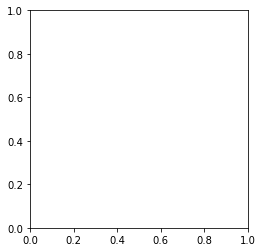

In [87]:
labels = types.index
explode = [.1,0,0,0,0,0,0,0,0,0]
colors = ["red", "green", "blue", "yellow", "lightcoral", "darkorchid", "slategray", "orange", "peru","dodgerblue"]
plt.pie(types,explode = explode, labels = labels, colors = colors, shadow = True)
plt.title("Types of Breweries Currently Active")
plt.legend(loc= 'best')
plt.show()


Used homework code because I was curious about latitude/temperature/count relationship, didn't work need to adjust, original code used Georgetown colorado name for Georgetown, DC, need state codes

In [15]:
cities = openbrewery_db["city"]
url = "http://api.openweathermap.org/data/2.5/forecast?q="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
found_lats = []
found_longs = []
for i, each_city in enumerate(cities[:10]):
    display(f"Processing Record {i} of Set 1 | {each_city}")
    city_json = requests.get(f'{url}{each_city}&appid={weather_api_key}').json()
    
    try:
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        found_city.append(each_city)
        found_lats.append(city_json["coord"]["lat"])
        found_longs.append(city_json["coord"]["lon"])
    except:
        display(f'{each_city} not found. Skipping...')
        pass

'Processing Record 0 of Set 1 | Knox'

'Knox not found. Skipping...'

'Processing Record 1 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 2 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 3 of Set 1 | Bend'

'Bend not found. Skipping...'

'Processing Record 4 of Set 1 | Boise'

'Boise not found. Skipping...'

'Processing Record 5 of Set 1 | Denver'

'Denver not found. Skipping...'

'Processing Record 6 of Set 1 | Portland'

'Portland not found. Skipping...'

'Processing Record 7 of Set 1 | San Diego'

'San Diego not found. Skipping...'

'Processing Record 8 of Set 1 | Reno'

'Reno not found. Skipping...'

'Processing Record 9 of Set 1 | Quilcene'

'Quilcene not found. Skipping...'

In [40]:
weather_df = pd.DataFrame({
    "city" : found_city,
    "Lat" : found_lats,
    "Lng" : found_longs,
    "Max Temp (degrees F)" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
})
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32
weather_df.head()

NameError: name 'found_city' is not defined

Merged DataFrame, original bug shown with multiple incorrect Georgetowns

In [46]:
merged_df = pd.merge(dropped_df,weather_df, on = "city")
merged_df = merged_df.rename(columns = ({"Lat": "City Lat", "Lng" : "City Lng", "longitude" : "Brewery Longitude", "latitude": "Brewery Latitude"}))

,id,name,brewery_type,street,city,state,country,Brewery Longitude,Brewery Latitude,City Lat,City Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed
341,16-mile-brewing-co-georgetown,16 Mile Brewing Co,micro,413 S Bedford St,Georgetown,Delaware,United States,-75.378164,38.678894,5.4112,100.3354,86.000,61,20,3.60
342,barking-armadillo-brewing-georgetown,Barking Armadillo Brewing,micro,507 River Bend,Georgetown,Texas,United States,-97.693249,30.660811,5.4112,100.3354,86.000,61,20,3.60
343,guanella-pass-brewing-company-llc-georgetown,"Guanella Pass Brewing Company, LLC",micro,501 Rose Street,Georgetown,Colorado,United States,-105.697303,39.705772,5.4112,100.3354,86.000,61,20,3.60
405,2-tread-brewing-co-santa-rosa,2 Tread Brewing Co,brewpub,1018 Santa Rosa Plz,Santa Rosa,California,United States,-122.716773,38.438777,14.3122,121.1114,84.200,54,40,7.72
406,fogbelt-brewing-co-santa-rosa,Fogbelt Brewing Co,brewpub,1305 Cleveland Ave,Santa Rosa,California,United States,-122.726608,38.449000,14.3122,121.1114,84.200,54,40,7.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,stormcloud-brewing-company-frankfort,Stormcloud Brewing Company,brewpub,303 Main St,Frankfort,Michigan,United States,-86.241002,44.632906,-27.2667,28.4833,59.684,93,35,1.43
4554,stormcloud-brewing-company-production-facility...,Stormcloud Brewing Company Production Facility,micro,366 Parkview Ln,Frankfort,Michigan,United States,-86.221812,44.637393,-27.2667,28.4833,59.684,93,35,1.43
4571,talking-waters-brewing-co-montevideo,Talking Waters Brewing Co.,micro,205 S 1st St,Montevideo,Minnesota,United States,-95.723503,44.942758,-34.8335,-56.1674,69.008,82,0,1.54
4681,uncle-ernies-bayfront-grill-brew-house-panama-...,Uncle Ernies Bayfront Grill & Brew House,contract,1151 Bayview Ave,Panama City,Florida,United States,-85.702765,30.169812,8.9936,-79.5197,75.992,83,20,2.57


Orginal working code with bugs plot shown, didn't get to add in third variable of size of point equaling to amount of breweries per latitude

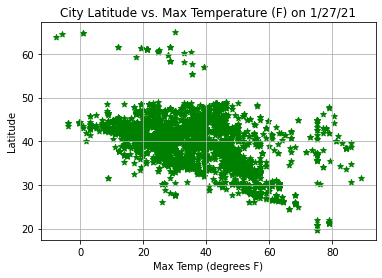

In [48]:
plt.scatter(y = merged_df["Brewery Latitude"], x = merged_df["Max Temp (degrees F)"],marker = "*", c= "g")
plt.ylabel("Latitude")
plt.xlabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/27/21")
plt.grid(True)
#plt.savefig("../output_data/Fig1")
plt.show()